In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

In [4]:
file_path = os.path.join("Resources", "Exotic - Zebra Mussels.csv")
zebra_mussels = pd.read_csv(file_path)

zebra_mussels

,Specimen Number,Species ID,Group,Family,Scientific Name,Common Name,Country,State,County,Locality,...,Title 5,Publisher 5,Location 5,Reference 6,Type 6,Date 6,Author 6,Title 6,Publisher 6,Location 6
0,615085,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Winnipeg Beach, Manitoba, Ca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,615297,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Gimli Harbour, Manitoba, Canada",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,615300,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Willow Point, Manitoba, Canada",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,615301,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Silver Harbour, Manitoba, Ca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,615302,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Balsam Bay Harbour, Manitoba...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7925,118181,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,Ohio River (R.M. 205) [just below Belleville L...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7926,118184,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,Ohio River (R.M. 176) at Muskingum Island at B...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7927,118438,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,Ohio River (R.M. 175.2) about 3 miles downrive...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7928,541415,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,"Ohio River at RM 205.2, ORSANCO survey site OH...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
zebra_mussels[zebra_mussels["Latitude"] == 0]

,Specimen Number,Species ID,Group,Family,Scientific Name,Common Name,Country,State,County,Locality,...,Title 5,Publisher 5,Location 5,Reference 6,Type 6,Date 6,Author 6,Title 6,Publisher 6,Location 6
5935,749843,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,OH,Fairfield,Long Lake,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
zebra_mussels = zebra_mussels[zebra_mussels["Latitude"] != 0]
zebra_mussels

,Specimen Number,Species ID,Group,Family,Scientific Name,Common Name,Country,State,County,Locality,...,Title 5,Publisher 5,Location 5,Reference 6,Type 6,Date 6,Author 6,Title 6,Publisher 6,Location 6
0,615085,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Winnipeg Beach, Manitoba, Ca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,615297,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Gimli Harbour, Manitoba, Canada",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,615300,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Willow Point, Manitoba, Canada",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,615301,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Silver Harbour, Manitoba, Ca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,615302,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Balsam Bay Harbour, Manitoba...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7925,118181,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,Ohio River (R.M. 205) [just below Belleville L...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7926,118184,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,Ohio River (R.M. 176) at Muskingum Island at B...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7927,118438,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,Ohio River (R.M. 175.2) about 3 miles downrive...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7928,541415,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,"Ohio River at RM 205.2, ORSANCO survey site OH...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
wanted_columns = ["Specimen Number", "Species ID", "Group", "Family", "Scientific Name", "Common Name", "Country", "State", "County", "Locality", "Latitude", "Longitude", "Drainage Name", "Year", "Month", "Day"]
zebra_mussels = zebra_mussels[wanted_columns]
zebra_mussels.head()

,Specimen Number,Species ID,Group,Family,Scientific Name,Common Name,Country,State,County,Locality,Latitude,Longitude,Drainage Name,Year,Month,Day
0,615085,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Winnipeg Beach, Manitoba, Ca...",50.50821,-96.96738,NaN,2013,10.0,17.0
1,615297,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Gimli Harbour, Manitoba, Canada",50.63182,-96.98356,NaN,2013,10.0,11.0
2,615300,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Willow Point, Manitoba, Canada",50.60386,-96.95781,NaN,2013,10.0,NaN
3,615301,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Silver Harbour, Manitoba, Ca...",50.81161,-96.96326,NaN,2013,10.0,NaN
4,615302,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Balsam Bay Harbour, Manitoba...",50.47381,-96.58357,NaN,2013,10.0,NaN


In [8]:
zebra_mussels = zebra_mussels.dropna(how='any', subset=['Latitude', 'Longitude'])
zebra_mussels

,Specimen Number,Species ID,Group,Family,Scientific Name,Common Name,Country,State,County,Locality,Latitude,Longitude,Drainage Name,Year,Month,Day
0,615085,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Winnipeg Beach, Manitoba, Ca...",50.508210,-96.967380,NaN,2013,10.0,17.0
1,615297,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Gimli Harbour, Manitoba, Canada",50.631820,-96.983560,NaN,2013,10.0,11.0
2,615300,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Willow Point, Manitoba, Canada",50.603860,-96.957810,NaN,2013,10.0,NaN
3,615301,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Silver Harbour, Manitoba, Ca...",50.811610,-96.963260,NaN,2013,10.0,NaN
4,615302,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Balsam Bay Harbour, Manitoba...",50.473810,-96.583570,NaN,2013,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7925,118181,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,Ohio River (R.M. 205) [just below Belleville L...,39.105370,-81.740356,Upper Ohio-Shade,1998,NaN,NaN
7926,118184,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,Ohio River (R.M. 176) at Muskingum Island at B...,39.377380,-81.491425,Upper Ohio-Shade,1998,NaN,NaN
7927,118438,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,Ohio River (R.M. 175.2) about 3 miles downrive...,39.380695,-81.489883,Upper Ohio-Shade,1999,NaN,NaN
7928,541415,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,WV,Wood,"Ohio River at RM 205.2, ORSANCO survey site OH...",39.099000,-81.741470,Upper Ohio-Shade,2005,10.0,5.0


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

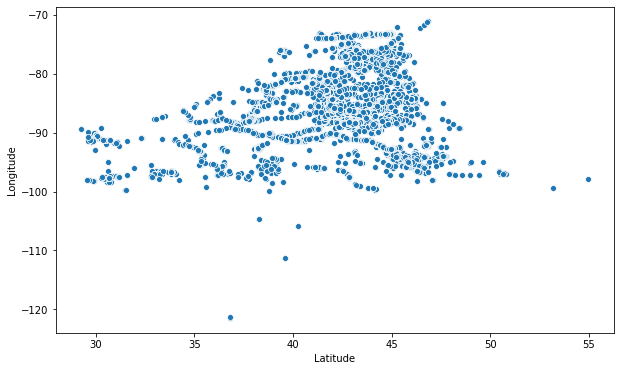

In [59]:
plt.figure(figsize = (10,6))
sns.scatterplot(zebra_mussels["Latitude"], zebra_mussels["Longitude"])

In [60]:
z_map = folium.Map(location=[45.5236, -95.6750], zoom_start=5)
zebra_mussels.apply(lambda row:folium.Marker(location=[row["Latitude"], row["Longitude"]] ).add_to(z_map), axis=1)
z_map

In [61]:
zebra_mussels["Latitude"] = np.radians(zebra_mussels["Latitude"])
zebra_mussels["Longitude"] = np.radians(zebra_mussels["Longitude"])

In [62]:
from sklearn.cluster import KMeans ,AgglomerativeClustering

# # creates 5 clusters using hierarchical clustering.
# agc = AgglomerativeClustering(n_clusters =5, affinity='euclidean', linkage='ward')
# zebras_frogs['pickup cluster'] = agc.fit_predict(zebras_frogs[['Latitude','Longitude']])

# creates 5 clusters using k-means clustering algorithm.
kmeans = KMeans(5)
clusters = kmeans.fit_predict(zebra_mussels[['Latitude','Longitude']])
zebra_mussels['cluster'] = kmeans.predict(zebra_mussels[['Latitude','Longitude']])
zebra_mussels.head()

,Specimen Number,Species ID,Group,Family,Scientific Name,Common Name,Country,State,County,Locality,Latitude,Longitude,Drainage Name,Year,Month,Day,cluster
0,615085,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Winnipeg Beach, Manitoba, Ca...",0.881535,-1.692400,NaN,2013,10.0,17.0,4
1,615297,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Gimli Harbour, Manitoba, Canada",0.883692,-1.692682,NaN,2013,10.0,11.0,4
2,615300,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Willow Point, Manitoba, Canada",0.883204,-1.692233,NaN,2013,10.0,NaN,4
3,615301,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Silver Harbour, Manitoba, Ca...",0.886830,-1.692328,NaN,2013,10.0,NaN,4
4,615302,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Balsam Bay Harbour, Manitoba...",0.880934,-1.685701,NaN,2013,10.0,NaN,4


In [63]:
zebra_mussels[zebra_mussels['cluster'] == 2].head()

,Specimen Number,Species ID,Group,Family,Scientific Name,Common Name,Country,State,County,Locality,Latitude,Longitude,Drainage Name,Year,Month,Day,cluster
1375,158363,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,AL,NaN,Guntersville Lake,0.601216,-1.504823,Guntersville Lake,1995,NaN,NaN,2
1376,116453,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,AL,Colbert,Tennessee River (R.M. 250.0) (Upper Pickwick R...,0.606219,-1.531741,Pickwick Lake,1992,8.0,25.0,2
1377,1407253,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,AL,Colbert,"Tennessee River, at Florence",0.606948,-1.530533,Pickwick Lake,2017,6.0,19.0,2
1378,1407254,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,AL,Colbert,"Tennessee River, at Florence",0.607146,-1.529796,Pickwick Lake,2017,6.0,20.0,2
1379,1407257,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,United States of America,AL,Colbert,"Tennessee River, ~2 mi. downstream of Florence",0.606889,-1.530719,Pickwick Lake,2017,6.0,21.0,2


In [66]:
zebra_mussels[zebra_mussels['cluster'] == 4].head()

,Specimen Number,Species ID,Group,Family,Scientific Name,Common Name,Country,State,County,Locality,Latitude,Longitude,Drainage Name,Year,Month,Day,cluster
0,615085,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Winnipeg Beach, Manitoba, Ca...",0.881535,-1.692400,NaN,2013,10.0,17.0,4
1,615297,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Gimli Harbour, Manitoba, Canada",0.883692,-1.692682,NaN,2013,10.0,11.0,4
2,615300,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Willow Point, Manitoba, Canada",0.883204,-1.692233,NaN,2013,10.0,NaN,4
3,615301,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Silver Harbour, Manitoba, Ca...",0.886830,-1.692328,NaN,2013,10.0,NaN,4
4,615302,5,Mollusks-Bivalves,Dreissenidae,Dreissena polymorpha,zebra mussel,Canada,Manitoba,NaN,"Lake Winnipeg, at Balsam Bay Harbour, Manitoba...",0.880934,-1.685701,NaN,2013,10.0,NaN,4


In [72]:
terrain = sns.color_palette(palette='terrain',n_colors=10)
plasma = sns.color_palette(palette='plasma',n_colors=10)
rainbow = sns.color_palette(palette='rainbow',n_colors=6)

from bokeh.io import output_notebook
from bokeh.layouts import gridplot,row,column
from bokeh.plotting import figure,show
output_notebook()

Loading BokehJS ...

In [75]:
print('data dimensions:',zebra_mussels.shape)

data dimensions: (7928, 17)
